In [3]:
import dlib
import cv2
import numpy as np
from PIL import Image
import sys
import os
import pyocr
import pyocr.builders

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16,12

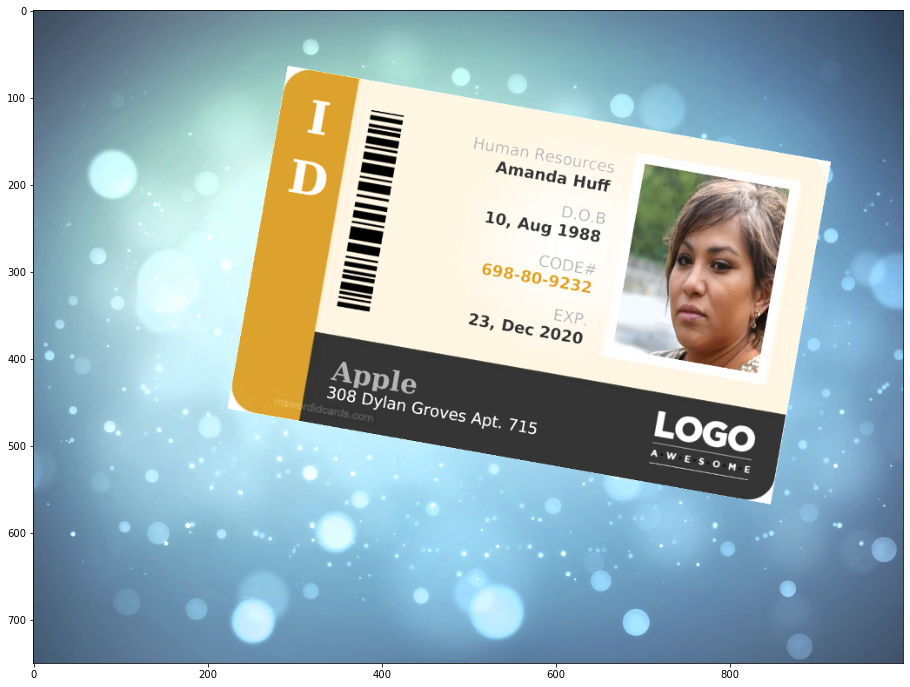

In [11]:
image = cv2.imread(os.path.join('.', "dataset", "validation", 'image_0.png'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

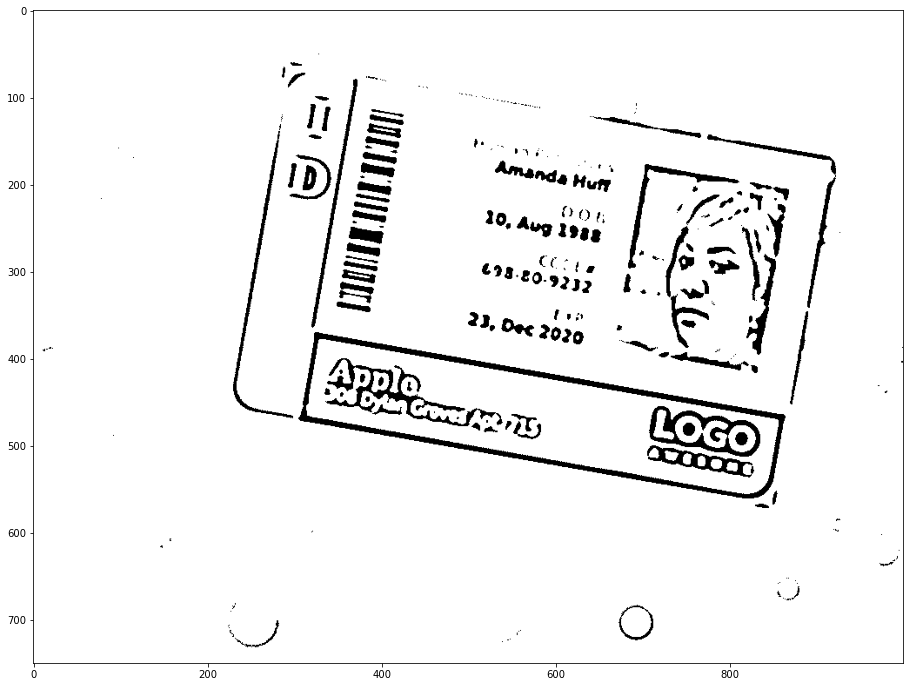

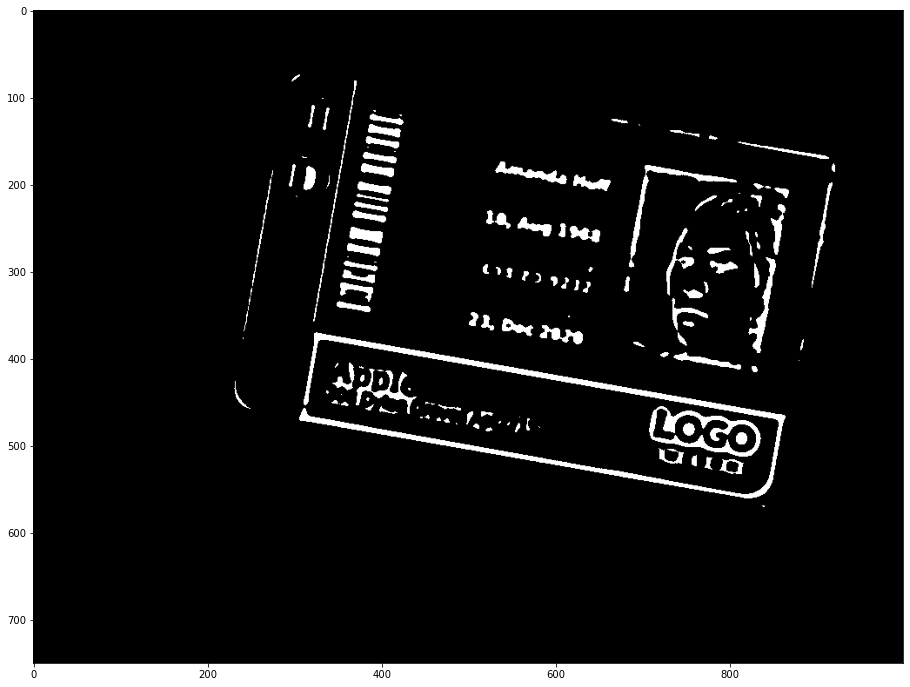

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (13, 13), 0)
#plt.figure()
#plt.imshow(blurred, 'gray')
#plt.figure()
#thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure()
plt.imshow(thresh, 'gray')
plt.figure()
thresh = 255 - cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 13)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
plt.imshow(closing, 'gray')


[[[605 173]]

 [[309 606]]]


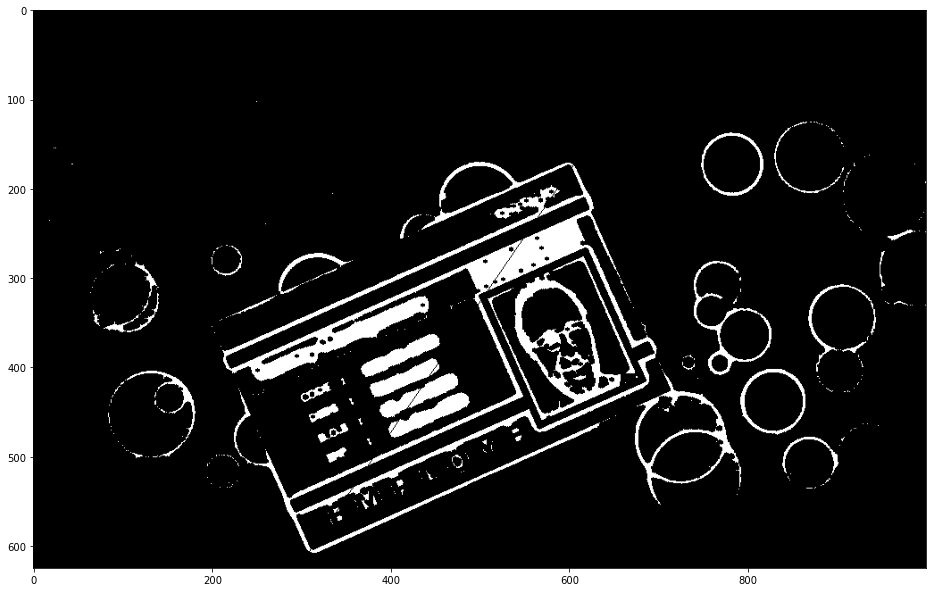

In [196]:
def countPixelsInContour(image, contour):
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, cv2.FILLED)
    return cv2.countNonZero(mask)

cimg, contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#print(len(contours))
#a=[]
#for cnt in contours:
#    a.append(cv2.contourArea(cnt))
#    #cv2.drawContours(closing, contours, -1, 255, cv2.FILLED)
#    cv2.fillPoly(closing, pts =[cnt], color=255)
#cv2.morphologyEx(closing, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
#plt.figure()
#plt.imshow(cimg.copy(), 'gray')
#_, contoursfilled, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#print(len(contoursfilled))
#c = None
#b=[]
#c_max = cv2.contourArea(contoursfilled[0])
#for cnt in contoursfilled:
#    b.append(cv2.contourArea(cnt))
#    c = c if c_max > cv2.contourArea(cnt) else cnt
#print(a,b)
contours.sort(key=lambda x: countPixelsInContour(closing, x), reverse=True)
c = contours[0]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.05 * peri, True)
print(approx)
cv2.fillPoly(closing, pts =[approx], color=0)
plt.figure()
plt.imshow(closing, 'gray')

-55.64338302612305


TypeError: Image data of dtype object cannot be converted to float

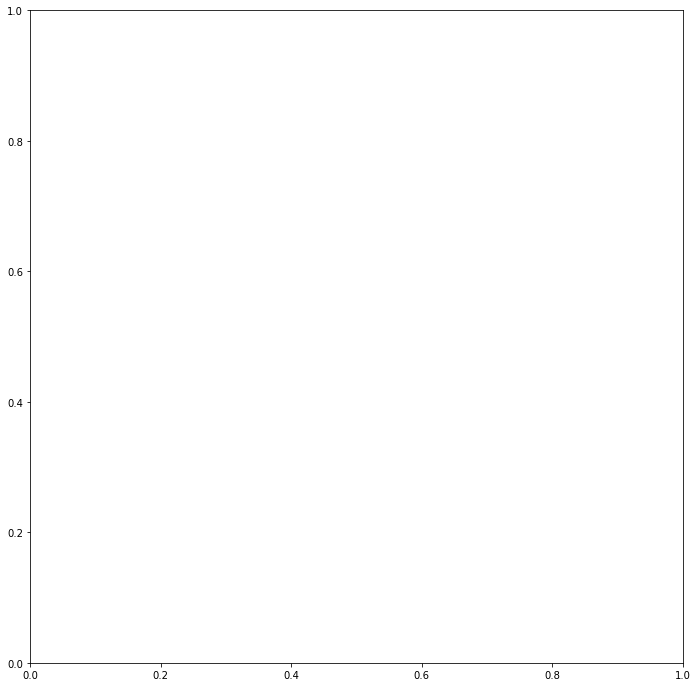

In [197]:
center, size, angle = cv2.minAreaRect(approx)
print(angle)
center, size = tuple(map(int, center)), tuple(map(int, size))
height, width = image.shape[0], image.shape[1]
M = cv2.getRotationMatrix2D(center, angle, 1)
img_rot = cv2.warpAffine(image, M, (width, height))
img_crop = cv2.getRectSubPix(img_rot, size, center)
plt.figure()
plt.imshow(img_crop, 'gray')

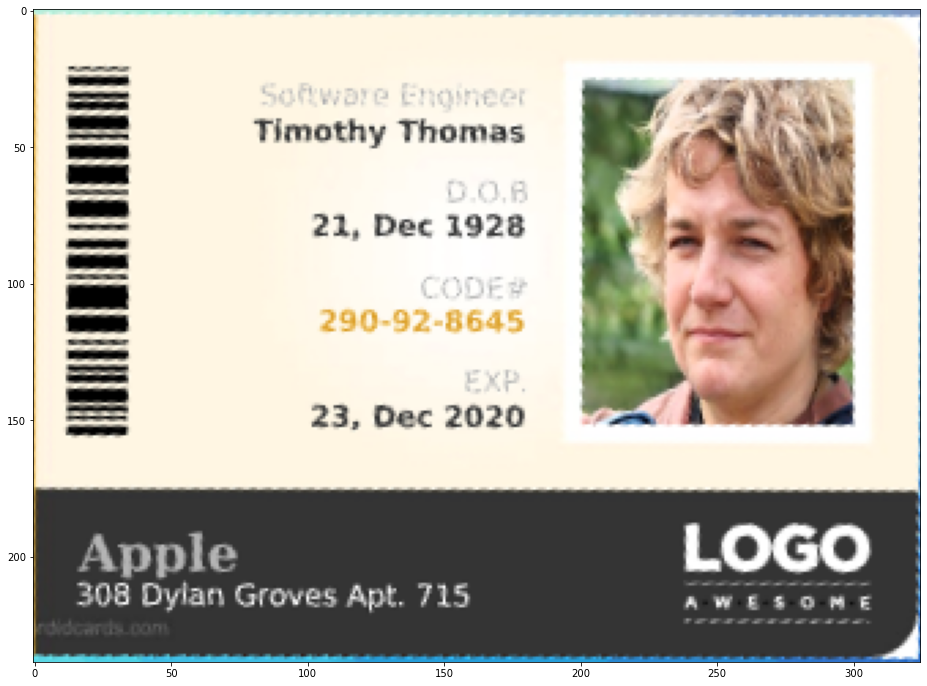

In [193]:
idcrgb = cv2.rotate(img_crop, cv2.ROTATE_90_COUNTERCLOCKWISE) if angle <= -45 else img_crop
plt.figure()
plt.imshow(idcrgb, 'gray')